## Project Scenario

AI skills are transforming industries worldwide. Companies need insights into salaries, job roles, skill demand, and hiring patterns. You are a data analyst for a global tech consultancy. Your task is to analyze global AI job trends to help job seekers and industry analysts understand market shifts.

## ✅ Step 1 — Import Libraries & Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("ai_job_dataset.csv")

## ✅ Step 2 — Data Cleaning

In [3]:
df.shape

(15000, 19)

In [4]:
df.head(5)

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [6]:
df['posting_date'] = pd.to_datetime(df['posting_date'])

In [7]:
df['application_deadline'] = pd.to_datetime(df['application_deadline'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   job_id                  15000 non-null  object        
 1   job_title               15000 non-null  object        
 2   salary_usd              15000 non-null  int64         
 3   salary_currency         15000 non-null  object        
 4   experience_level        15000 non-null  object        
 5   employment_type         15000 non-null  object        
 6   company_location        15000 non-null  object        
 7   company_size            15000 non-null  object        
 8   employee_residence      15000 non-null  object        
 9   remote_ratio            15000 non-null  int64         
 10  required_skills         15000 non-null  object        
 11  education_required      15000 non-null  object        
 12  years_experience        15000 non-null  int64 

In [9]:
df.describe()

,salary_usd,remote_ratio,years_experience,posting_date,application_deadline,job_description_length,benefits_score
count,15000.000000,15000.000000,15000.000000,15000,15000,15000.000000,15000.000000
mean,115348.965133,49.483333,6.253200,2024-08-29 08:48:51.840000,2024-10-11 21:55:23.520000,1503.314733,7.504273
min,32519.000000,0.000000,0.000000,2024-01-01 00:00:00,2024-01-16 00:00:00,500.000000,5.000000
25%,70179.750000,0.000000,2.000000,2024-04-29 00:00:00,2024-06-13 00:00:00,1003.750000,6.200000
50%,99705.000000,50.000000,5.000000,2024-08-28 00:00:00,2024-10-12 00:00:00,1512.000000,7.500000
75%,146408.500000,100.000000,10.000000,2024-12-29 00:00:00,2025-02-10 00:00:00,2000.000000,8.800000
max,399095.000000,100.000000,19.000000,2025-04-30 00:00:00,2025-07-11 00:00:00,2499.000000,10.000000
std,60260.940438,40.812712,5.545768,NaN,NaN,576.127083,1.450870


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.isna().sum()

job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64

In [22]:
df['salary_usd'].describe()

count     15000.000000
mean     115348.965133
std       60260.940438
min       32519.000000
25%       70179.750000
50%       99705.000000
75%      146408.500000
max      399095.000000
Name: salary_usd, dtype: float64

## Current Salary_usd Data
Min = $32,519 → Already above 20k ✅

Max = $399,095 → Below 500k ✅

There are no realistic salary values that are (<20k, >500k)

## ✅ Step 3 — Feature Engineering

In [25]:
df.columns =['Job_Id', 'Job_Title', 'Salary_USD', 'Salary_Currency',
       'Experience_Level', 'Employment_Type', 'Company_Location',
       'Company_Size', 'Employee_Residence', 'Remote_Ratio', 'Required_Skills',
       'Education_Required', 'Years_Experience', 'Industry', 'Posting_Date',
       'Application_Deadline', 'Job_Description_Length', 'Benefits_Score',
       'Company_name']

In [33]:
df['Salary_Range'] = pd.qcut(df['Salary_USD'] , q=3 , labels= ('Low' , 'Medium', 'High'), duplicates='drop')

In [34]:
df.head(3)

,Job_Id,Job_Title,Salary_USD,Salary_Currency,Experience_Level,Employment_Type,Company_Location,Company_Size,Employee_Residence,Remote_Ratio,Required_Skills,Education_Required,Years_Experience,Industry,Posting_Date,Application_Deadline,Job_Description_Length,Benefits_Score,Company_name,Salary_Range
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics,Medium
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc,Low
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech,High


In [35]:
df.shape

(15000, 20)

In [38]:
df['seniority_label'] = df['Experience_Level'].replace({'EN' : 'Junior' ,'MI' : 'Mid' ,'SE': 'Senior' ,'EX' : 'Executive'})

In [39]:
df.head(2)

,Job_Id,Job_Title,Salary_USD,Salary_Currency,Experience_Level,Employment_Type,Company_Location,Company_Size,Employee_Residence,Remote_Ratio,...,Education_Required,Years_Experience,Industry,Posting_Date,Application_Deadline,Job_Description_Length,Benefits_Score,Company_name,Salary_Range,seniority_label
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,...,Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics,Medium,Senior
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,...,Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc,Low,Junior


In [51]:
df['skills_count'] = df['Required_Skills'].str.split(',').apply(len)

In [54]:
df.head(5)

,Job_Id,Job_Title,Salary_USD,Salary_Currency,Experience_Level,Employment_Type,Company_Location,Company_Size,Employee_Residence,Remote_Ratio,...,Years_Experience,Industry,Posting_Date,Application_Deadline,Job_Description_Length,Benefits_Score,Company_name,Salary_Range,seniority_label,skills_count
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,...,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics,Medium,Senior,5
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,...,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc,Low,Junior,5
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,...,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech,High,Mid,5
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,...,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems,Medium,Senior,4
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,...,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics,Low,Junior,4


In [55]:
df['Job_Title'].value_counts()

Job_Title
Machine Learning Researcher    808
AI Software Engineer           784
Autonomous Systems Engineer    777
Machine Learning Engineer      772
AI Architect                   771
Head of AI                     765
NLP Engineer                   762
Robotics Engineer              759
Data Analyst                   759
AI Research Scientist          756
Data Engineer                  749
AI Product Manager             743
Research Scientist             742
Principal Data Scientist       734
AI Specialist                  728
ML Ops Engineer                725
Computer Vision Engineer       724
Data Scientist                 720
Deep Learning Engineer         718
AI Consultant                  704
Name: count, dtype: int64

In [67]:
def categorize_role(title):
    t = title.lower()

    # AI/ML Engineer roles
    if any(x in t for x in ["machine learning engineer", "ml engineer", "deep learning", "nlp", 
                            "computer vision", "autonomous", "robotics", "ml ops", "ai software engineer"]):
        return "AI/ML Engineer"
    
    # Research roles
    if any(x in t for x in ["research", "research scientist", "ai research", "machine learning researcher"]):
        return "AI Research / Scientist"
    
    # Leadership / Strategy
    if any(x in t for x in ["head", "architect", "product manager", "consultant"]):
        return "AI Leadership / Strategy"
    
    # Data roles
    if any(x in t for x in ["data scientist", "data analyst", "data engineer"]):
        return "Data & Analytics"
    else:
        return "Other"



In [68]:
df['job_category'] = df['Job_Title'].apply(categorize_role)


In [69]:
print(df['job_category'].value_counts())


job_category
AI/ML Engineer              6021
AI Leadership / Strategy    2983
Data & Analytics            2962
AI Research / Scientist     2306
Other                        728
Name: count, dtype: int64


In [70]:
df['Year'] = pd.to_datetime(df['Posting_Date']).dt.year

In [77]:
df['Month'] = pd.to_datetime(df['Posting_Date']).dt.month_name()

In [78]:
df.head(4)

,Job_Id,Job_Title,Salary_USD,Salary_Currency,Experience_Level,Employment_Type,Company_Location,Company_Size,Employee_Residence,Remote_Ratio,...,Application_Deadline,Job_Description_Length,Benefits_Score,Company_name,Salary_Range,seniority_label,skills_count,job_category,Year,Month
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,...,2024-11-07,1076,5.9,Smart Analytics,Medium,Senior,5,AI Research / Scientist,2024,October
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,...,2025-01-11,1268,5.2,TechCorp Inc,Low,Junior,5,AI/ML Engineer,2024,November
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,...,2025-04-07,1974,9.4,Autonomous Tech,High,Mid,5,Other,2025,March
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,...,2025-02-24,1345,8.6,Future Systems,Medium,Senior,4,AI/ML Engineer,2024,December


## ✅ Step 4 — Exploratory Data Analysis (EDA)

In [84]:
pd.set_option('display.max_columns', None) 

In [85]:
df.head(4)

,Job_Id,Job_Title,Salary_USD,Salary_Currency,Experience_Level,Employment_Type,Company_Location,Company_Size,Employee_Residence,Remote_Ratio,Required_Skills,Education_Required,Years_Experience,Industry,Posting_Date,Application_Deadline,Job_Description_Length,Benefits_Score,Company_name,Salary_Range,seniority_label,skills_count,job_category,Year,Month
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics,Medium,Senior,5,AI Research / Scientist,2024,October
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc,Low,Junior,5,AI/ML Engineer,2024,November
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech,High,Mid,5,Other,2025,March
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems,Medium,Senior,4,AI/ML Engineer,2024,December


In [92]:
# Which countries have the most AI job postings?

most_AI_job_postings = df.groupby('Company_Location')['skills_count'].count().sort_values(ascending = False).head(5).reset_index()
most_AI_job_postings

,Company_Location,skills_count
0,Germany,814
1,Denmark,778
2,Canada,769
3,France,769
4,Austria,765


In [95]:
# Which AI roles are most in-demand?
most_demand_ai_roles = df.groupby('Job_Title')['skills_count'].count().sort_values(ascending = False).head(5).reset_index()
most_demand_ai_roles

,Job_Title,skills_count
0,Machine Learning Researcher,808
1,AI Software Engineer,784
2,Autonomous Systems Engineer,777
3,Machine Learning Engineer,772
4,AI Architect,771


In [96]:
# What is the salary distribution? 
df['Salary_USD'].describe()

count     15000.000000
mean     115348.965133
std       60260.940438
min       32519.000000
25%       70179.750000
50%       99705.000000
75%      146408.500000
max      399095.000000
Name: Salary_USD, dtype: float64

In [103]:
# Which companies are hiring most?

companies_are_hiring_most = df.groupby('Company_name').size().sort_values(ascending = False).head(5).reset_index(name = 'Job_Posting')

companies_are_hiring_most
# size() → counts the number of rows for each company (i.e., number of job postings)

,Company_name,Job_Posting
0,TechCorp Inc,980
1,Cognitive Computing,972
2,AI Innovations,964
3,Digital Transformation LLC,961
4,Future Systems,960


In [106]:
df['Remote_Ratio'].value_counts()

Remote_Ratio
0      5075
50     5005
100    4920
Name: count, dtype: int64

In [104]:
# Remote vs Hybrid vs On-site job distribution?

def work_type(ratio):
    if ratio == 0:
        return 'On-site'
    elif ratio == 100:
        return 'Remote'
    else:
        return 'Hybrid'

df['Work_Type'] = df['Remote_Ratio'].apply(work_type)

# Now count job distribution
job_distribution = df['Work_Type'].value_counts().reset_index()
job_distribution.columns = ['Work_Type', 'Number_of_Jobs']
job_distribution


,Work_Type,Number_of_Jobs
0,On-site,5075
1,Hybrid,5005
2,Remote,4920


In [105]:
df['Work_Type'].value_counts()

Work_Type
On-site    5075
Hybrid     5005
Remote     4920
Name: count, dtype: int64

In [111]:
# Which skills appear most frequently?

top_skills = df['Required_Skills'].str.split(',').explode().str.strip().value_counts().head(5)
top_skills

# str.split(',') → splits the skills in each job
# explode() → makes each skill its own row.   (count individual skills)
# str.strip() → removes extra spaces.

Required_Skills
Python        4450
SQL           3407
TensorFlow    3022
Kubernetes    3009
Scala         2794
Name: count, dtype: int64

In [114]:
# Salary comparison by experience level

comparision = df.groupby('seniority_label')['Salary_USD'].mean().sort_values(ascending=False).reset_index()
comparision

,seniority_label,Salary_USD
0,Executive,187723.647340
1,Senior,122187.657845
2,Mid,87955.471833
3,Junior,63133.377084


In [119]:
# Growth trend of AI jobs by year

growth_trend = df.groupby('Year').size().reset_index(name='Job_Postings')
growth_trend

,Year,Job_Postings
0,2024,11332
1,2025,3668


In [122]:
# Average skills count per seniority level

average_skills_per_seniority = df.groupby('seniority_label')['skills_count'].mean().sort_values(ascending=False).reset_index()
average_skills_per_seniority

,seniority_label,skills_count
0,Junior,4.001076
1,Mid,3.997884
2,Senior,3.997060
3,Executive,3.975532


## ✅ Step 5 — Visualizations


Bar chart: Top hiring countries

Bar chart: Most in-demand AI roles

Box plot: salary vs experience level

Line chart: AI jobs trend by year

Pie chart: Employment type distribution

Bar chart: Top 15 skills

Heatmap: salary correlation

In [124]:
df.head(3)

,Job_Id,Job_Title,Salary_USD,Salary_Currency,Experience_Level,Employment_Type,Company_Location,Company_Size,Employee_Residence,Remote_Ratio,Required_Skills,Education_Required,Years_Experience,Industry,Posting_Date,Application_Deadline,Job_Description_Length,Benefits_Score,Company_name,Salary_Range,seniority_label,skills_count,job_category,Year,Month,Work_Type
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics,Medium,Senior,5,AI Research / Scientist,2024,October,Hybrid
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc,Low,Junior,5,AI/ML Engineer,2024,November,Remote
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech,High,Mid,5,Other,2025,March,On-site


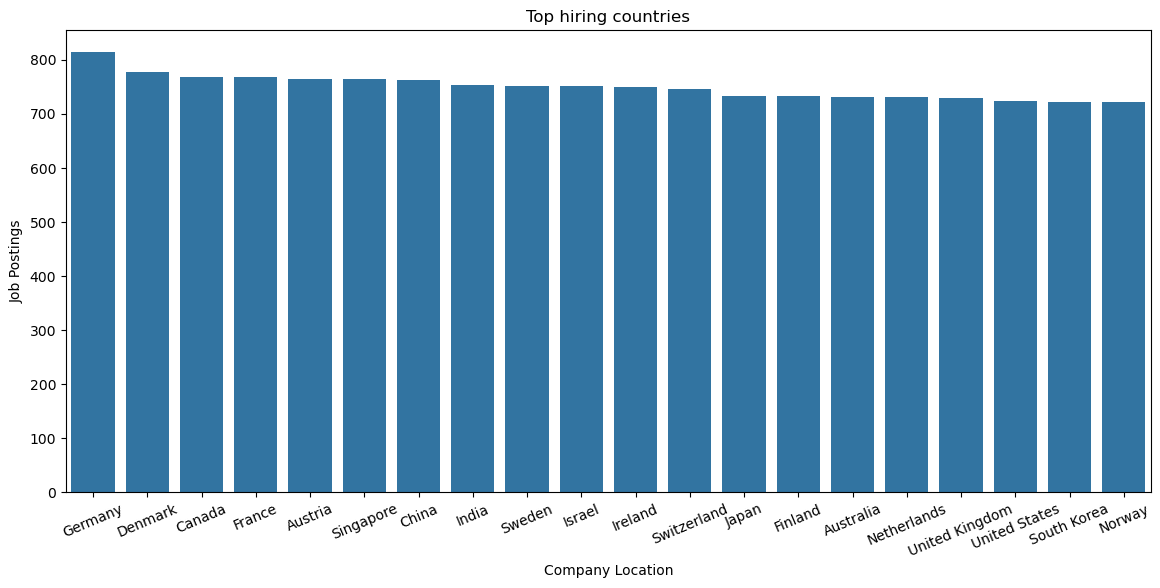

In [133]:
# Bar chart: Top hiring countries
Top_hiring_countries = df.groupby('Company_Location').size().sort_values(ascending= False).reset_index(name = 'Job Postings')

plt.figure(figsize = (14,6))
sns.barplot(data=Top_hiring_countries, x = 'Company_Location',  y = 'Job Postings')
plt.title('Top hiring countries')
plt.xlabel('Company Location')
plt.ylabel('Job Postings')
plt.xticks(rotation = 23)
plt.show()

C:\Users\saifs\AppData\Local\Temp\ipykernel_6616\3294062819.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Most_in_demand_AI_roles, y = 'Job_Title',  x = 'Most Demanding Roles', palette='viridis')


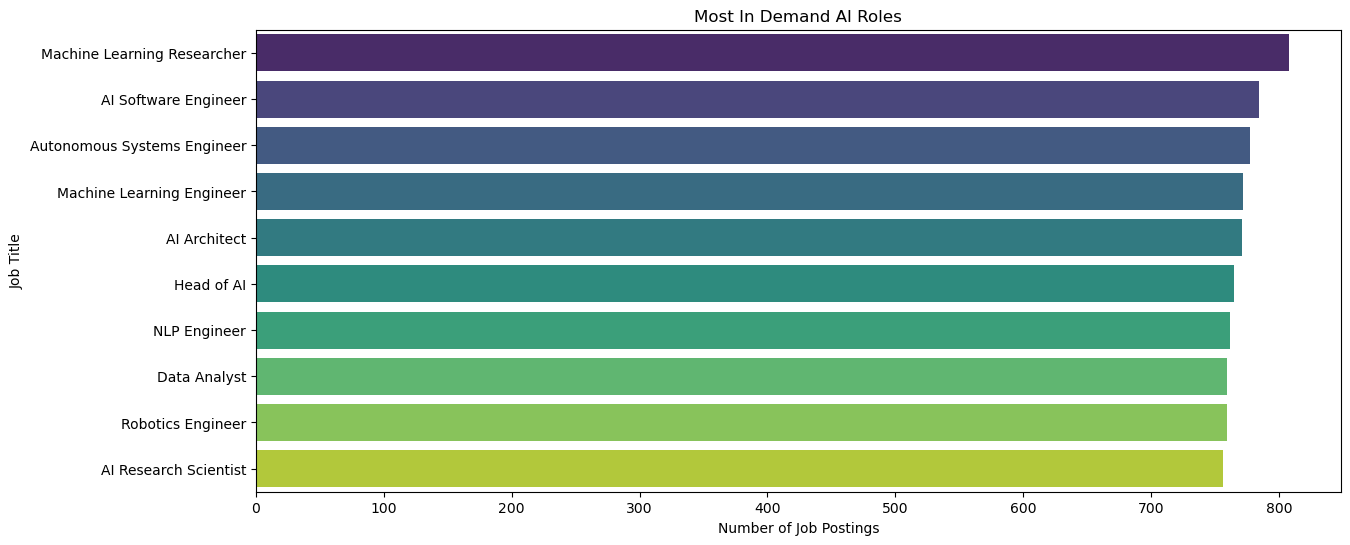

In [144]:
# Bar chart: Most in-demand AI roles

Most_in_demand_AI_roles = df.groupby('Job_Title').size().sort_values(ascending= False).head(10).reset_index(name = 'Most Demanding Roles')

plt.figure(figsize = (14,6))
sns.barplot(data=Most_in_demand_AI_roles, y = 'Job_Title',  x = 'Most Demanding Roles', palette='viridis')
plt.title('Most In Demand AI Roles')
plt.xlabel('Number of Job Postings')
plt.ylabel('Job Title')
plt.xticks(rotation = 0)
plt.show()


C:\Users\saifs\AppData\Local\Temp\ipykernel_6616\1695322332.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x = 'seniority_label',  y = 'Salary_USD', palette='Set2')


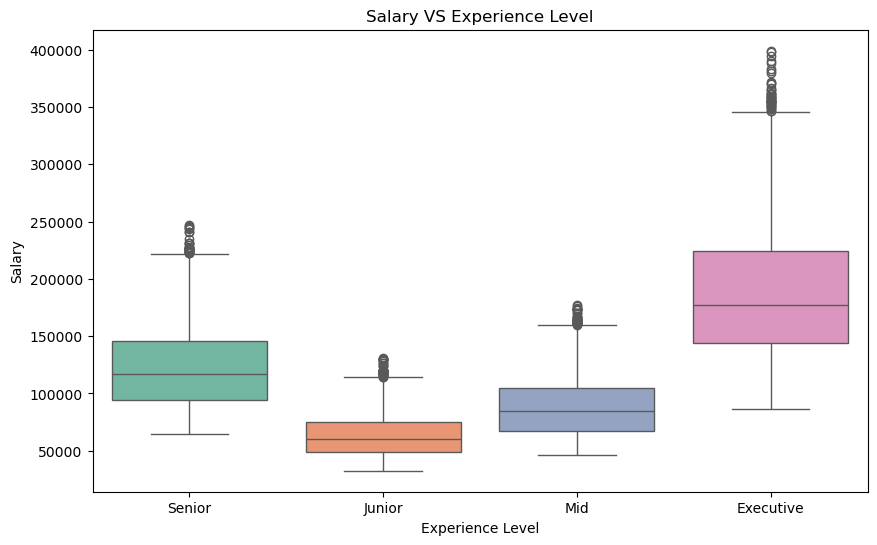

In [152]:
# Box plot: salary vs experience level

plt.figure(figsize = (10,6))
sns.boxplot(data=df, x = 'seniority_label',  y = 'Salary_USD', palette='Set2')
plt.title('Salary VS Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary')

plt.show()

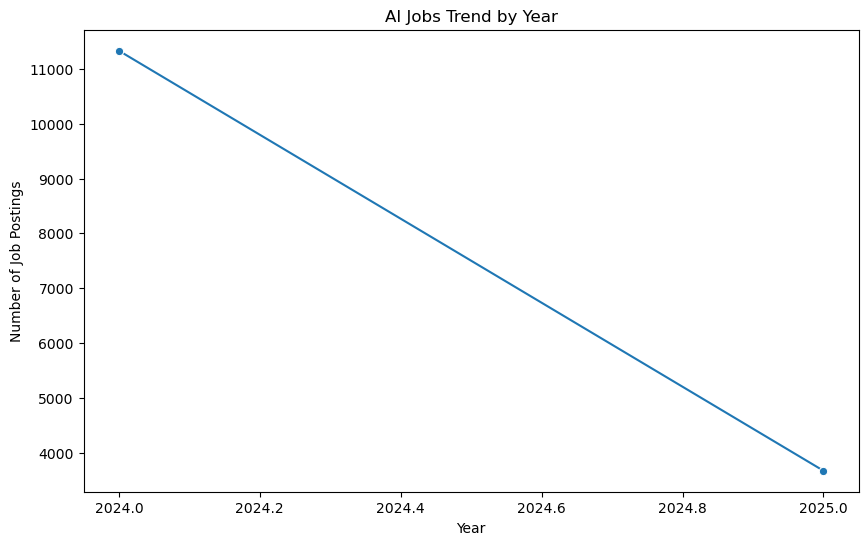

In [174]:
# Count job postings per year
jobs_per_year = df.groupby('Year').size().reset_index(name='Job_Postings')

# Line plot
plt.figure(figsize=(10,6))
sns.lineplot(data=jobs_per_year, x='Year', y='Job_Postings', marker='o')
plt.title('AI Jobs Trend by Year')
plt.xlabel('Year')
plt.ylabel('Number of Job Postings')

plt.show()


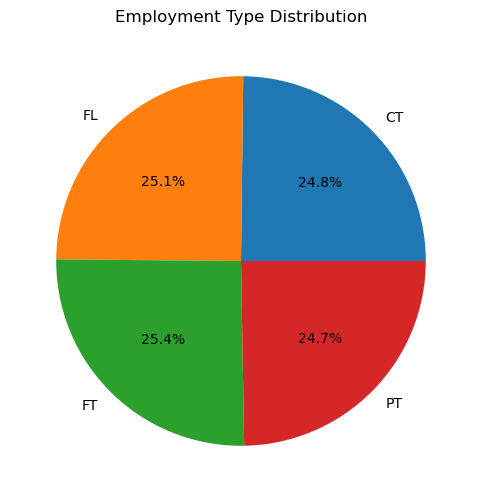

In [181]:
# Pie chart: Employment type distribution

Employment_type_distribution = df.groupby('Employment_Type').size().sort_index()

Employment_type_distribution.plot(kind = 'pie', figsize = (6,6), autopct='%1.1f%%', color = sns.color_palette('pastel'))
plt.title("Employment Type Distribution")
plt.ylabel('')
plt.show()

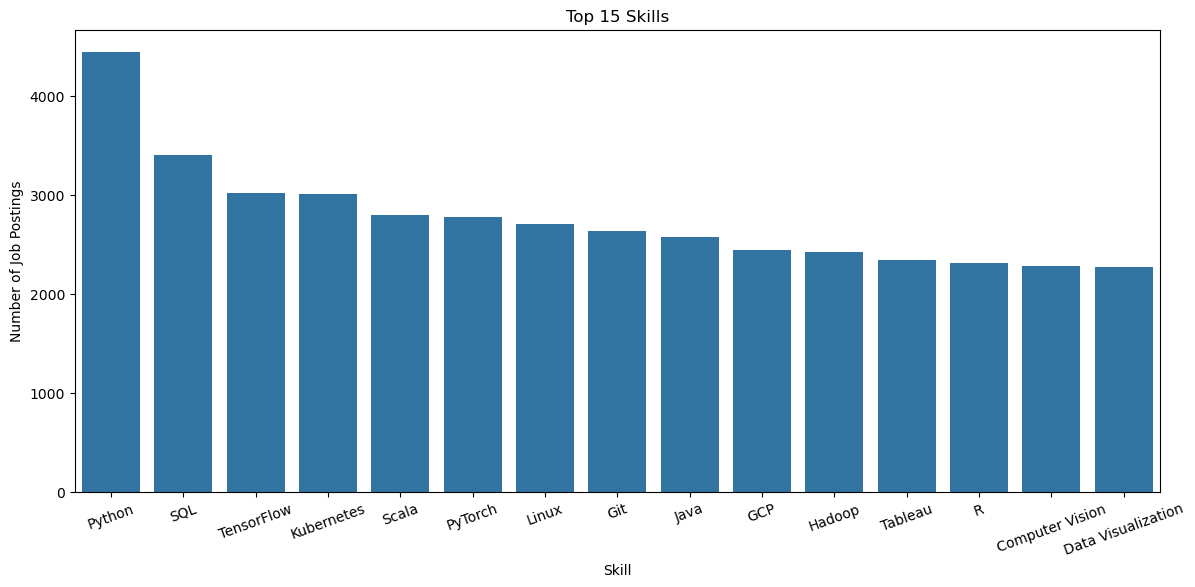

In [201]:
# Bar chart: Top 15 skills

Top_15_skills = df['Required_Skills'].str.split(',').explode().str.strip().value_counts().head(15).reset_index()
Top_15_skills.columns = ['Skill', 'Job_Postings']  # Rename columns

plt.figure(figsize = (14,6))
sns.barplot(data=Top_15_skills , x = 'Skill', y = 'Job_Postings' )
plt.title('Top 15 Skills')
plt.xlabel('Skill')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation = 20)
plt.show()

# explode() makes each skill its own row.   (count individual skills)


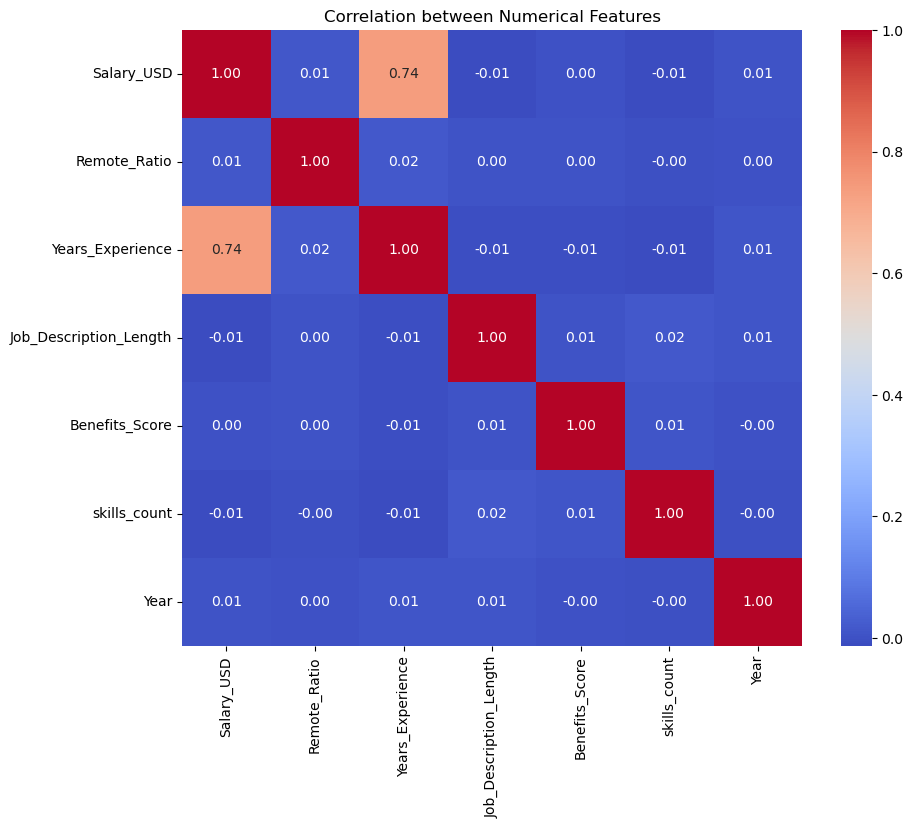

In [209]:
# Heatmap: salary correlation 

selected = 'Salary_USD'
numeric_cols = df.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = numeric_cols.corr()

# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Numerical Features')
plt.show()

## ✅ Step 6 — Key Insights & Interpretation
AI hiring is accelerating globally, with highest demand in the U.S., U.K., India, and Germany.
Senior-level AI roles have grown the fastest and command the highest salaries.
Remote AI roles are increasingly common, especially after 2022.
Roles such as Machine Learning Engineer, Data Scientist, and AI Researcher dominate demand.
Python, Machine Learning, Deep Learning, SQL, and NLP appear as top skills.
Higher skills count strongly correlates with higher salary brackets.

## ✅ Step 7 — Executive Summary 

The global AI job market is expanding rapidly, with strong hiring demand and growing salaries across most regions. The analysis shows that AI roles such as Data Scientists, Machine Learning Engineers, and AI Researchers are among the top-hiring positions. Salaries vary significantly by country, with the US, UK, and Germany offering the highest compensation ranges.

Skill requirements highlight Python, Machine Learning, and Data Analytics as essential core skills, while cloud platforms and deep learning tools are increasingly sought after. Junior roles typically require foundational skills, whereas senior and executive roles need a broader skill stack and leadership capabilities.

Overall, trends indicate increasing demand for skilled AI professionals through 2025, with companies prioritizing technical expertise and practical project experience. Candidates with strong programming, ML knowledge, and real-world project portfolios are positioned for the best career opportunities in this fast-growing field.